In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv("weather.csv")

In [3]:
df1 = df.T

In [4]:
df1.isna().value_counts()

0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99     100    101    102    103    104    105    106    107    108    109    110    111    112    113    114    115    116    117    118    119    120    121    122    123    124    125    126    127    128    129    130    131    132    133    134    135    136    137    138    139    140    141    142   

In [5]:
df1.head(30)

,0,1,2,3,4,5,6,7,8,9,...,356,357,358,359,360,361,362,363,364,365
MinTemp,8.0,14.0,13.7,13.3,7.6,6.2,6.1,8.3,8.8,8.4,...,3.4,3.2,0.9,3.3,7.9,9.0,7.1,12.5,12.5,12.3
MaxTemp,24.3,26.9,23.4,15.5,16.1,16.9,18.2,17.0,19.5,22.8,...,15.0,18.0,20.7,25.5,26.1,30.7,28.4,19.9,26.9,30.2
Rainfall,0.0,3.6,3.6,39.8,2.8,0.0,0.2,0.0,0.0,16.2,...,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Evaporation,3.4,4.4,5.8,7.2,5.6,5.8,4.2,5.6,4.0,5.4,...,4.8,7.4,5.4,5.2,6.8,7.6,11.6,8.4,5.0,6.0
Sunshine,6.3,9.7,3.3,9.1,10.6,8.2,8.4,4.6,4.1,7.7,...,11.7,12.2,8.4,10.8,3.5,12.1,12.7,5.3,7.1,12.6
WindGustDir,NW,ENE,NW,NW,SSE,SE,SE,E,S,E,...,S,SSE,NNW,N,NNW,NNW,N,ESE,NW,NW
WindGustSpeed,30.0,39.0,85.0,54.0,50.0,44.0,43.0,41.0,48.0,31.0,...,70.0,48.0,39.0,43.0,43.0,76.0,48.0,43.0,46.0,78.0
WindDir9am,SW,E,N,WNW,SSE,SE,SE,SE,E,S,...,S,SSE,SSE,N,NaN,SSE,NNW,ENE,SSW,NW
WindDir3pm,NW,W,NNE,W,ESE,E,ESE,E,ENE,ESE,...,S,S,N,NNW,WNW,NW,NNW,ENE,WNW,WNW
WindSpeed9am,6.0,4.0,6.0,30.0,20.0,20.0,19.0,11.0,19.0,7.0,...,35.0,26.0,2.0,4.0,0.0,7.0,2.0,11.0,6.0,31.0


<Axes: >

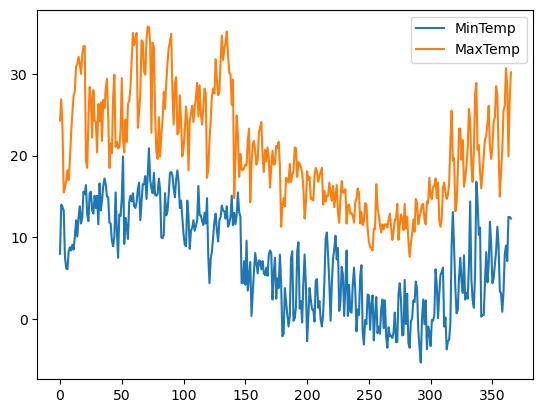

In [6]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df.plot(kind='line', y=(['MinTemp', 'MaxTemp']))

<Axes: >

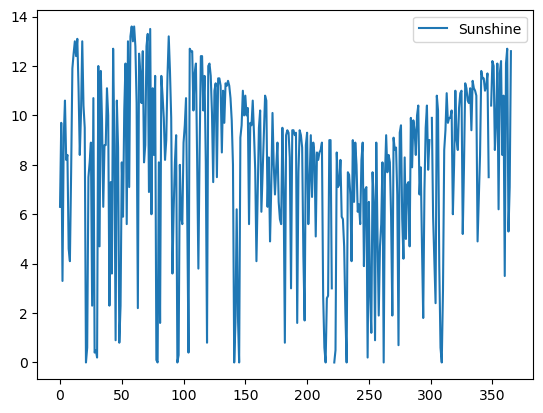

In [7]:
df.plot(kind='line', y='Sunshine')

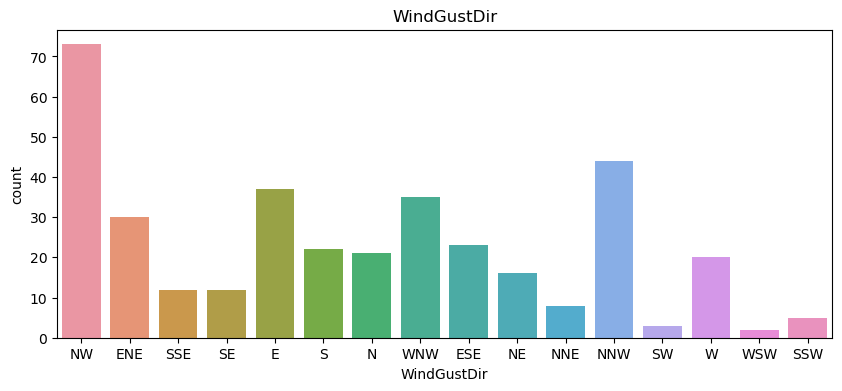

In [8]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(x="WindGustDir", data=df)
plt.title("WindGustDir")
plt.show()

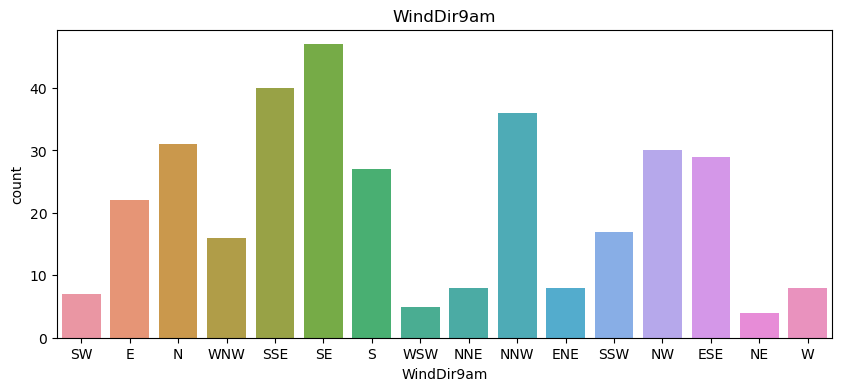

In [9]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(x="WindDir9am", data=df)
plt.title("WindDir9am")
plt.show()

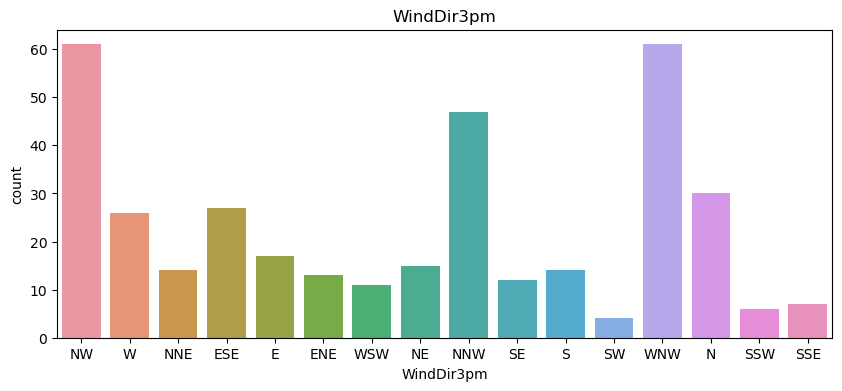

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(x="WindDir3pm", data=df)
plt.title("WindDir3pm")
plt.show()

In [11]:
df.RainTomorrow.value_counts()

No     300
Yes     66
Name: RainTomorrow, dtype: int64

In [12]:
weather = df.copy()
weather.shape

(366, 22)

In [13]:
# Wind direction change can be continuous. 

weather['WindGustDir'] = weather['WindGustDir'].replace(['NW', 'NNW', 'N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 
                                                         'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW'], 
                                                        [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
weather['WindGustDir'].value_counts()

0.0     73
1.0     44
6.0     37
15.0    35
5.0     30
7.0     23
10.0    22
2.0     21
14.0    20
4.0     16
9.0     12
8.0     12
3.0      8
11.0     5
12.0     3
13.0     2
Name: WindGustDir, dtype: int64

In [14]:
weather['WindDir9am'] = weather['WindDir9am'].replace(['NW', 'NNW', 'N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 
                                                       'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW'], 
                                                      [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
weather['WindDir9am'].value_counts()


8.0     47
9.0     40
1.0     36
2.0     31
0.0     30
7.0     29
10.0    27
6.0     22
11.0    17
15.0    16
3.0      8
5.0      8
14.0     8
12.0     7
13.0     5
4.0      4
Name: WindDir9am, dtype: int64

In [15]:
weather['WindDir3pm'] = weather['WindDir3pm'].replace(['NW', 'NNW', 'N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 
                                                       'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW'], 
                                                      [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
weather['WindDir3pm'].value_counts()

0.0     61
15.0    61
1.0     47
2.0     30
7.0     27
14.0    26
6.0     17
4.0     15
3.0     14
10.0    14
5.0     13
8.0     12
13.0    11
9.0      7
11.0     6
12.0     4
Name: WindDir3pm, dtype: int64

In [16]:
weather['RainToday'] = weather['RainToday'].replace(["Yes", "No"],[1, 0])
weather['RainToday'].value_counts()

0    300
1     66
Name: RainToday, dtype: int64

In [17]:
weather['RainTomorrow'] = weather['RainTomorrow'].replace(["Yes", "No"], [1, 0])
weather['RainTomorrow'].value_counts()

0    300
1     66
Name: RainTomorrow, dtype: int64

In [18]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    float64
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    float64
 8   WindDir3pm     365 non-null    float64
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [19]:
weather_1 = weather.dropna()
print(weather_1.shape)

loss_data_rate = 1- 328/366
loss_data_rate

(328, 22)


0.10382513661202186

In [20]:
corrmat = weather_1.corr()
corrmat

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
MinTemp,1.000000,0.745911,0.197339,0.634720,0.007730,0.016675,0.190596,-0.054658,0.066112,0.058319,...,-0.013897,-0.502352,-0.503255,0.211640,0.125914,0.910805,0.716051,0.213284,0.251519,0.246593
MaxTemp,0.745911,1.000000,-0.077263,0.673162,0.444863,-0.082626,0.070911,-0.025514,-0.029662,-0.296485,...,-0.520412,-0.268054,-0.367040,-0.187416,-0.144976,0.869609,0.988925,-0.083483,0.058638,0.066585
Rainfall,0.197339,-0.077263,1.000000,-0.011767,-0.158062,-0.013111,0.099442,-0.014832,0.100946,0.238705,...,0.287244,-0.348731,-0.263710,0.172610,0.134894,0.071893,-0.089740,0.676763,0.101909,0.147208
Evaporation,0.634720,0.673162,-0.011767,1.000000,0.310124,-0.021059,0.258050,-0.067523,-0.033655,0.006259,...,-0.374532,-0.363936,-0.380702,-0.114261,-0.111387,0.688749,0.655896,-0.044633,0.099727,0.098546
Sunshine,0.007730,0.444863,-0.158062,0.310124,1.000000,-0.065145,0.084768,-0.052258,0.023699,-0.103841,...,-0.760267,0.025630,-0.024120,-0.697603,-0.657198,0.199659,0.463721,-0.177942,-0.357231,-0.375677
WindGustDir,0.016675,-0.082626,-0.013111,-0.021059,-0.065145,1.000000,0.048465,0.114832,0.279342,0.115322,...,0.068638,-0.001178,0.044611,0.029237,-0.016312,-0.041443,-0.080976,0.006702,-0.082906,-0.067154
WindGustSpeed,0.190596,0.070911,0.099442,0.258050,0.084768,0.048465,1.000000,-0.265749,0.052792,0.540717,...,-0.043254,-0.524737,-0.510826,-0.018216,0.042849,0.229164,0.036039,0.199491,0.269151,0.255739
WindDir9am,-0.054658,-0.025514,-0.014832,-0.067523,-0.052258,0.114832,-0.265749,1.000000,0.005247,-0.159715,...,-0.032034,0.213327,0.215510,0.060111,0.041255,-0.073922,-0.010352,-0.094340,-0.132471,-0.143090
WindDir3pm,0.066112,-0.029662,0.100946,-0.033655,0.023699,0.279342,0.052792,0.005247,1.000000,0.175961,...,-0.010118,-0.153178,-0.084389,0.013264,-0.013709,-0.015448,-0.021192,0.074054,-0.064067,-0.033944
WindSpeed9am,0.058319,-0.296485,0.238705,0.006259,-0.103841,0.115322,0.540717,-0.159715,0.175961,1.000000,...,0.202122,-0.344290,-0.233682,0.117625,-0.012990,-0.017843,-0.315906,0.274974,0.053529,0.093142


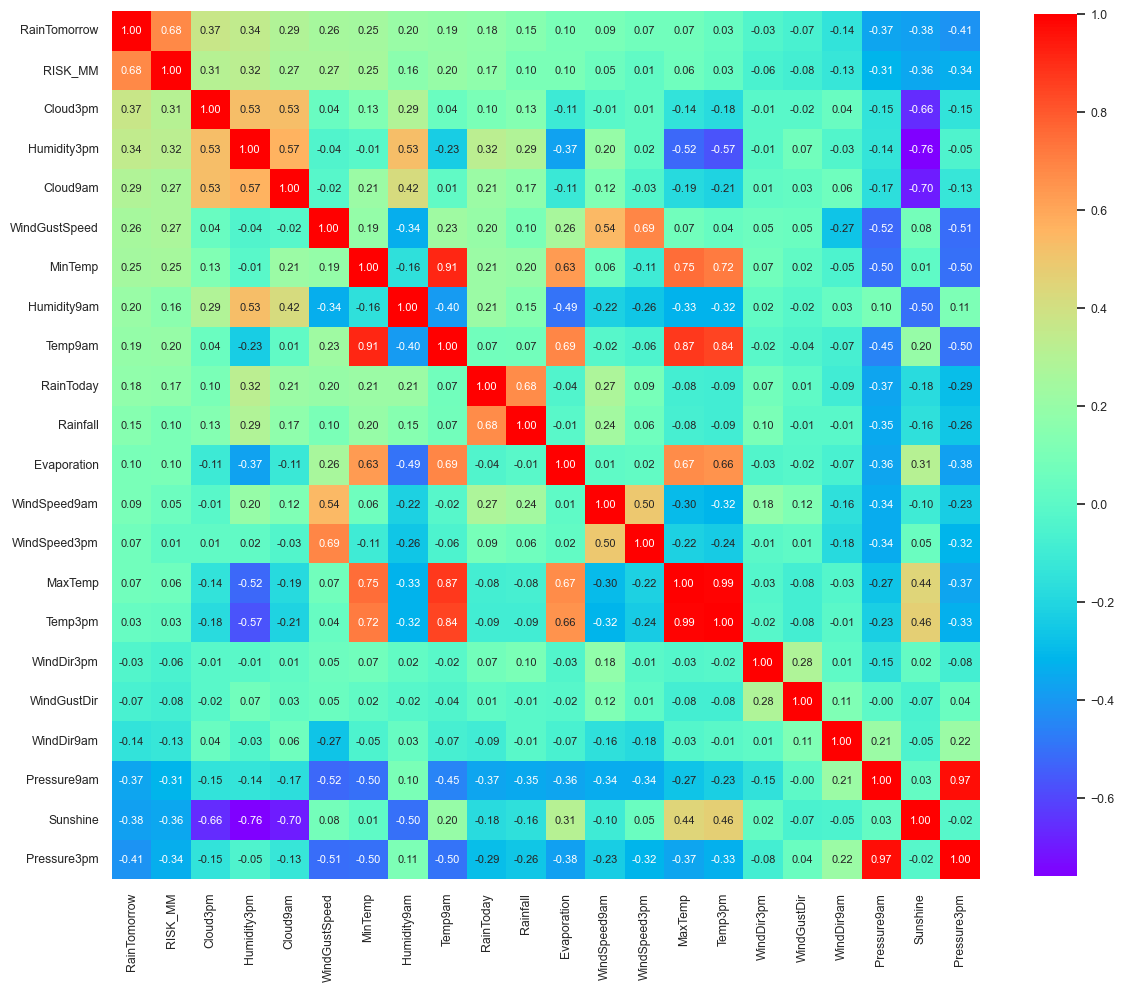

In [21]:
import numpy as np

plt.figure(figsize=(14, 14))
k=22
cols = corrmat.nlargest(k, 'RainTomorrow')['RainTomorrow'].index
cm = np.corrcoef(weather_1[cols].values.T)
sns.set(font_scale=0.8)
hm = sns.heatmap(cm, cbar=True, cbar_kws={"shrink": .8}, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, 
                 yticklabels=cols.values, xticklabels=cols.values, cmap="rainbow")
plt.show()

### target and features

In [22]:
target_1 = weather_1['RainTomorrow']
target_1.shape

(328,)

In [23]:
features_1 = weather_1.drop(['RainTomorrow'], axis=1)
features_1.shape
features_1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,8.0,24.3,0.0,3.4,6.3,0.0,30.0,12.0,0.0,6.0,...,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6
1,14.0,26.9,3.6,4.4,9.7,5.0,39.0,6.0,14.0,4.0,...,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6
2,13.7,23.4,3.6,5.8,3.3,0.0,85.0,2.0,3.0,6.0,...,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8
3,13.3,15.5,39.8,7.2,9.1,0.0,54.0,15.0,14.0,30.0,...,62,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8
4,7.6,16.1,2.8,5.6,10.6,9.0,50.0,9.0,7.0,20.0,...,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,1.0,76.0,9.0,0.0,7.0,...,38,15,1016.1,1010.8,1,3,20.4,30.0,0,0.0
362,7.1,28.4,0.0,11.6,12.7,2.0,48.0,1.0,1.0,2.0,...,45,22,1020.0,1016.9,0,1,17.2,28.2,0,0.0
363,12.5,19.9,0.0,8.4,5.3,7.0,43.0,5.0,5.0,11.0,...,63,47,1024.0,1022.8,3,2,14.5,18.3,0,0.0
364,12.5,26.9,0.0,5.0,7.1,0.0,46.0,11.0,15.0,6.0,...,69,39,1021.0,1016.2,6,7,15.8,25.9,0,0.0


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_1_std = scaler.fit_transform(features_1)

features_1_std = pd.DataFrame(features_1_std, columns = features_1.columns)
features_1_std.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,0.043296,0.508048,-0.336421,-0.486513,-0.489801,-1.153924,-0.792879,1.250344,-1.173625,-0.566006,...,-0.239179,-0.904853,0.052200,-0.236968,1.041777,1.132907,0.286309,0.609510,-0.47798,0.515058
1,1.054056,0.896277,0.504134,-0.112973,0.481268,-0.141927,-0.106492,-0.136734,1.314503,-0.822428,...,0.686493,-0.482674,-1.036540,-1.258655,0.368471,-0.377636,0.846475,0.926053,2.09214,0.515058
2,1.003518,0.373661,0.504134,0.409982,-1.346627,-1.153924,3.401706,-1.061453,-0.640454,-0.566006,...,0.840771,1.507599,-1.469053,-1.444417,1.378430,1.132907,0.467008,0.097012,2.09214,9.077909
3,0.936134,-0.805958,8.956384,0.932938,0.309903,-1.153924,1.037486,1.943883,1.314503,2.511065,...,-0.702015,0.723552,-2.065623,-1.475377,-0.641488,1.132907,0.123680,-0.822469,2.09214,0.325823
4,-0.024088,-0.716366,0.317344,0.335275,0.738315,0.667672,0.732425,0.556805,0.070439,1.228952,...,-0.239179,0.301373,-0.156600,0.304835,1.041777,1.132907,-0.309998,-0.626514,2.09214,-0.336497


In [25]:
from sklearn.model_selection import train_test_split, KFold

kf = KFold(n_splits = 5, shuffle = True, random_state=2305) 
for tr_idx, va_idx in kf.split(features_1_std):
    X_train_1, X_test_1 = features_1_std.iloc[tr_idx], features_1_std.iloc[va_idx]
    y_train_1, y_test_1 = target_1.iloc[tr_idx], target_1.iloc[va_idx]

X_train_1.shape, X_test_1.shape, y_train_1.shape, y_test_1.shape

((263, 21), (65, 21), (263,), (65,))

In [26]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [27]:
from xgboost import XGBClassifier

model_1 = XGBClassifier(n_estimators=20, random_state=2305, eval_metric='mlogloss')
model_1.fit(X_train_1, y_train_1)

pred_1 = model_1.predict_proba(X_test_1)[:, 1]
pred_1[:10]

array([0.00872981, 0.98612344, 0.00513756, 0.9845412 , 0.9845412 ,
       0.00667492, 0.00460675, 0.00667492, 0.00667492, 0.00667492],
      dtype=float32)

In [28]:
pred_1_label = np.where(pred_1 > 0.5, 1, 0)
pred_1_label[:10]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

### evaluation

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, pred_1_label))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00         9

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_1, pred_1_label)


array([[56,  0],
       [ 0,  9]], dtype=int64)

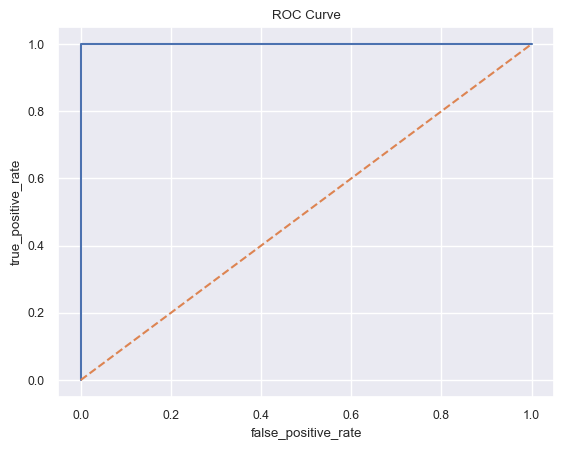

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_1, pred_1_label)

plt.title("ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

### important features


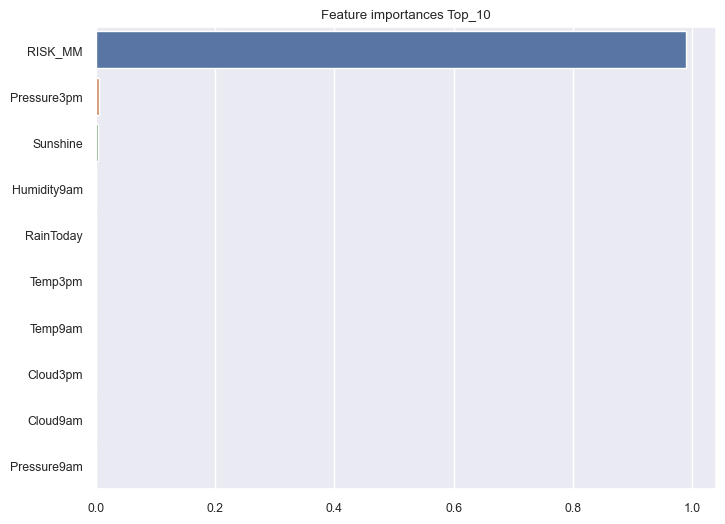

In [32]:
import seaborn as sns

XGBClassifier_importances_values = model_1.feature_importances_

XGBClassifier_importances = pd.Series(XGBClassifier_importances_values, index=X_train_1.columns)

XGBClassifier_top_10 = XGBClassifier_importances.sort_values(ascending=False)[:10]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top_10')
sns.barplot(x=XGBClassifier_top_10, y = XGBClassifier_top_10.index)
plt.show()

### some other models


In [33]:
X_1_kcv = pd.concat([X_train_1, X_test_1])
y_1_kcv = pd.concat([y_train_1, y_test_1])

# various ML methods
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

In [34]:
for model in [DummyClassifier, 
              LogisticRegression, 
              DecisionTreeClassifier, 
              KNeighborsClassifier, 
              GaussianNB, 
              SVC, 
              RandomForestClassifier, 
              xgboost.XGBClassifier]:
    cls = model()
    kfold = model_selection.KFold(
        n_splits = 10)
    s = model_selection.cross_val_score(
        cls, X_1_kcv, y_1_kcv, scoring = "roc_auc", cv = kfold)
    print(f"{model.__name__:22} AUC: " 
          f"{s.mean():.3f} STD: {s.std():.2f}")

DummyClassifier        AUC: 0.500 STD: 0.00
LogisticRegression     AUC: 0.988 STD: 0.01
DecisionTreeClassifier AUC: 1.000 STD: 0.00
KNeighborsClassifier   AUC: 0.809 STD: 0.09
GaussianNB             AUC: 1.000 STD: 0.00
SVC                    AUC: 0.965 STD: 0.04
RandomForestClassifier AUC: 1.000 STD: 0.00
XGBClassifier          AUC: 1.000 STD: 0.00
